## Note: (Continuation of Previous Notebook)

## Google Playstore:

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [3]:
df.shape

(10841, 13)

There are total 10841 rows and 13 columns.

Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

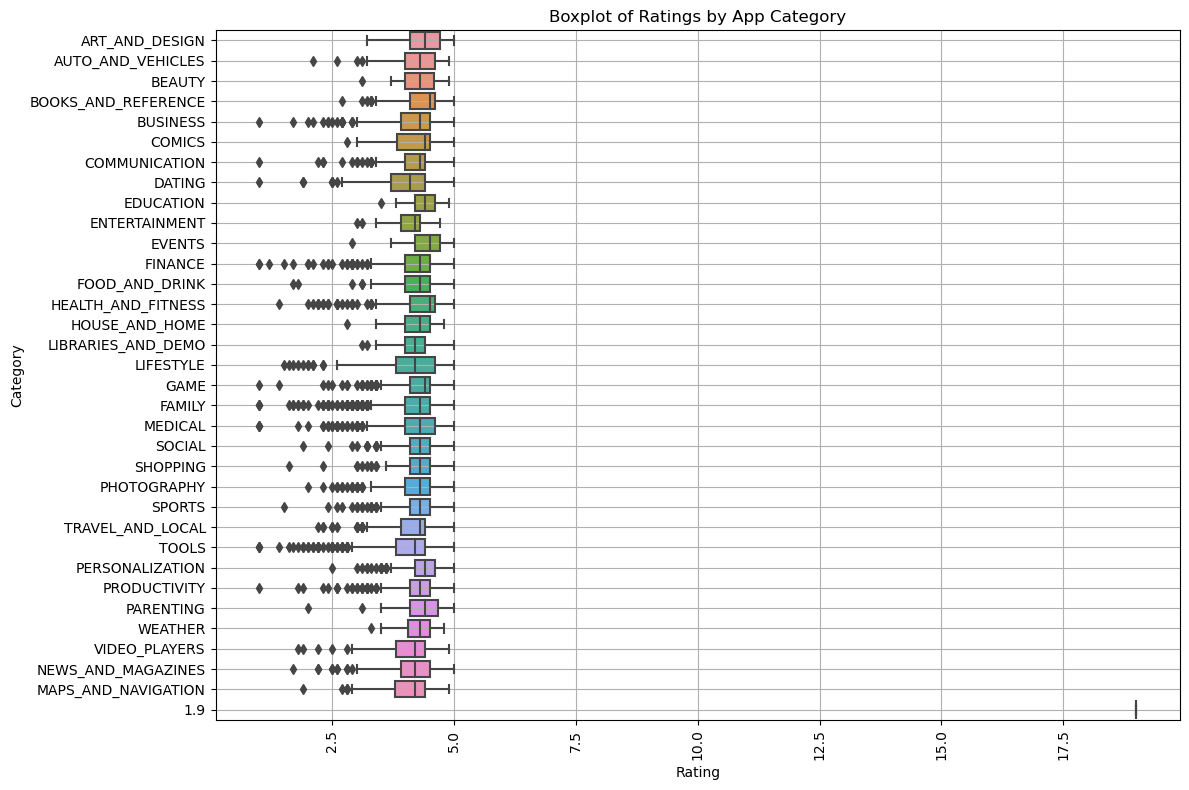

In [4]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Create a boxplot using Seaborn
sns.boxplot(x='Rating', y='Category', data=df)
plt.title('Boxplot of Ratings by App Category')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid()

plt.show()  # Display the plot

Observations:
    
1. Rating Range: The majority of app ratings across various categories fall within the range of 3 to 5, indicating generally positive user feedback.
2. Top-Rated Categories: The "Events" category stands out with the highest ratings, surpassing the average, followed closely by "Education" and "Art & Design" categories.
3. Lowest-Rated Category: The "Dating" category receives the lowest ratings, falling below the average ratings of other categories.

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Observations: 

- There is huge amount of missing values in 'Rating' feature : 1474\
The 'Rating' feature is crucial for understanding user satisfaction and app quality. Having a large number of missing ratings can skew any analysis that relies on app ratings, such as category-based comparisons or identifying top-rated categories.
- Some missing value in 'Type' : 1\
The 'Type' feature likely indicates whether an app is free or paid. A single missing value might not have a major impact.
- Some missing value in 'Content rating' : 1\
'Content Rating' provides information about the age appropriateness of apps. A single missing value might not have a major impact.
- Some missing values in 'Current Ver' : 8
- Some missing values in 'Android Ver' : 3\
The 'Current Ver' and 'Android Ver' features relate to app versions and compatibility. Missing values here might hinder understanding the relationship between app updates, compatibility, and user satisfaction.

#Preprocessing Of Data

In [6]:
df_copy = df.copy()

# Dropping the row containing inappropriate review value '3.0M'
df_copy = df_copy.drop(df_copy.index[10472])

# converting review col to float
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

# converting Size col to float after cleaning
df_copy['Size'] = df_copy['Size'].str.replace('M', '000')
df_copy['Size'] = df_copy['Size'].str.replace('k', '')
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)
df_copy['Size'] = df_copy['Size'].astype(float)

# removing special characters from Installs and Price col and converting to int/float
chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']

for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols] = df_copy[cols].str.replace(item,'')

df_copy['Installs'] = df_copy['Installs'].astype(int)
df_copy['Price'] = df_copy['Price'].astype(float)

# converting Last Updated col to datetime and separating date, month, year into separate features
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['Date'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

# Removing Duplicates
df_copy = df_copy.drop_duplicates(subset=['App'], keep='first')

# use the median value for missing data in the rating column
rating_median = df_copy["Rating"].median()
df_copy["Rating"].fillna(rating_median, inplace=True)

# Let's remove the other missing data as it is very little
df_copy.dropna(inplace=True)

# Handling the genres column
len(df_copy["Genres"].unique())
#The data is divided between genre and subgenre, let's only set by genre.
df_copy["Genres"] = df_copy["Genres"].str.split(";").str[0]
len(df_copy["Genres"].unique())
df_copy["Genres"].unique()
df_copy["Genres"].value_counts()
# Let's combine the music & audio with the music
df_copy["Genres"].replace("Music & Audio", "Music", inplace =True)

In [7]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

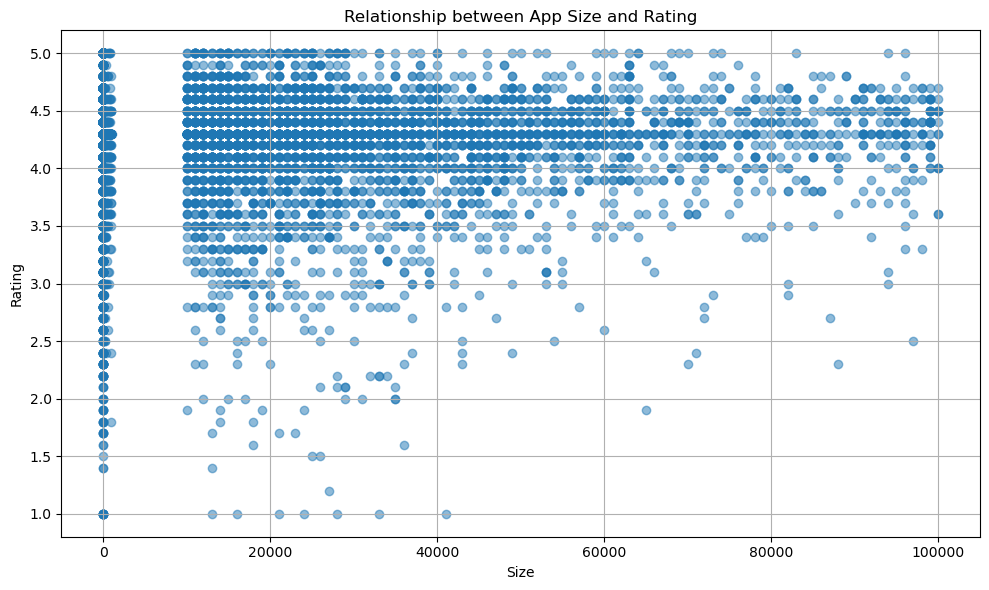

In [8]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(df_copy['Size'], df_copy['Rating'], alpha=0.5)  # Use 'alpha' to control point transparency
plt.title('Relationship between App Size and Rating')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()

plt.show()  # Display the plot

Observation: We can imply that most of the apps with higher rating range of 4.0 - 4.7 are having large size.


Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

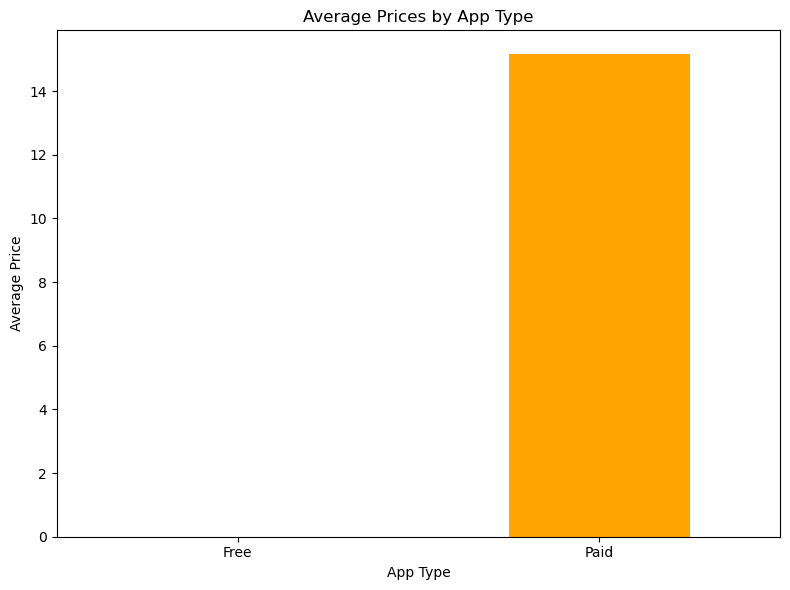

In [9]:
# Group data by app type and calculate average price for each type
average_prices = df_copy.groupby('Type')['Price'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
average_prices.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Prices by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)  # No rotation for x-axis labels
plt.tight_layout()

plt.show()  # Display the plot

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [10]:
df1 = df_copy.sort_values(by=['Installs'], ascending=False)
top_apps = df1.head(10)[['Installs', 'App']]

In [11]:
top_apps

,Installs,App
3736,1000000000,Google News
1654,1000000000,Subway Surfers
378,500000000,UC Browser - Fast Download Private & Secure
5596,500000000,Samsung Health
3255,500000000,SHAREit - Transfer & Share
347,500000000,imo free video calls and chat
3473,500000000,Dropbox
1655,500000000,Candy Crush Saga
1661,500000000,Temple Run 2
1662,500000000,Pou


Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

Here's how we can approach this task:

1. Data Preparation:
Load the Google Play Store dataset into a suitable data structure (e.g., DataFrame if using Python and pandas).
Review the dataset's columns, data types, and any missing values.

2. Data Exploration:
Examine the unique values in the 'Category' column to understand the available app categories.
Check the 'Installs' column to understand the distribution of installs across different categories.
Explore other relevant columns like 'Rating', 'Reviews', and 'Price' to gather initial insights.

3. Category Popularity Analysis:
Calculate the total number of installs for each app category to determine their popularity.
Consider the number of installs as a proxy for popularity, as it indicates user engagement and interest.

4. Category Engagement Analysis:
Analyze user engagement within each category by calculating the average number of reviews, ratings. This provides insights into how actively users engage with apps in each category.

5. Visualizations:
Create bar charts or histograms to visualize the distribution of installs and ratings across different categories, to explore potential correlations between installs, ratings, and other features.

6. Top Categories Recommendation:
Identify the top app categories based on high total installs, active engagement (average reviews), and possibly high ratings.

7. Monetization Strategy:
Consider the pricing strategy for the new app. Analyze how the pricing structure (free, paid) affects popularity within the top categories.

8. Recommendation and Strategy:
Summarize the findings and provide recommendations to the company based on the analysis.
Suggest the top categories to consider for the new app launch, along with insights on user engagement, competition, and potential monetization strategies.

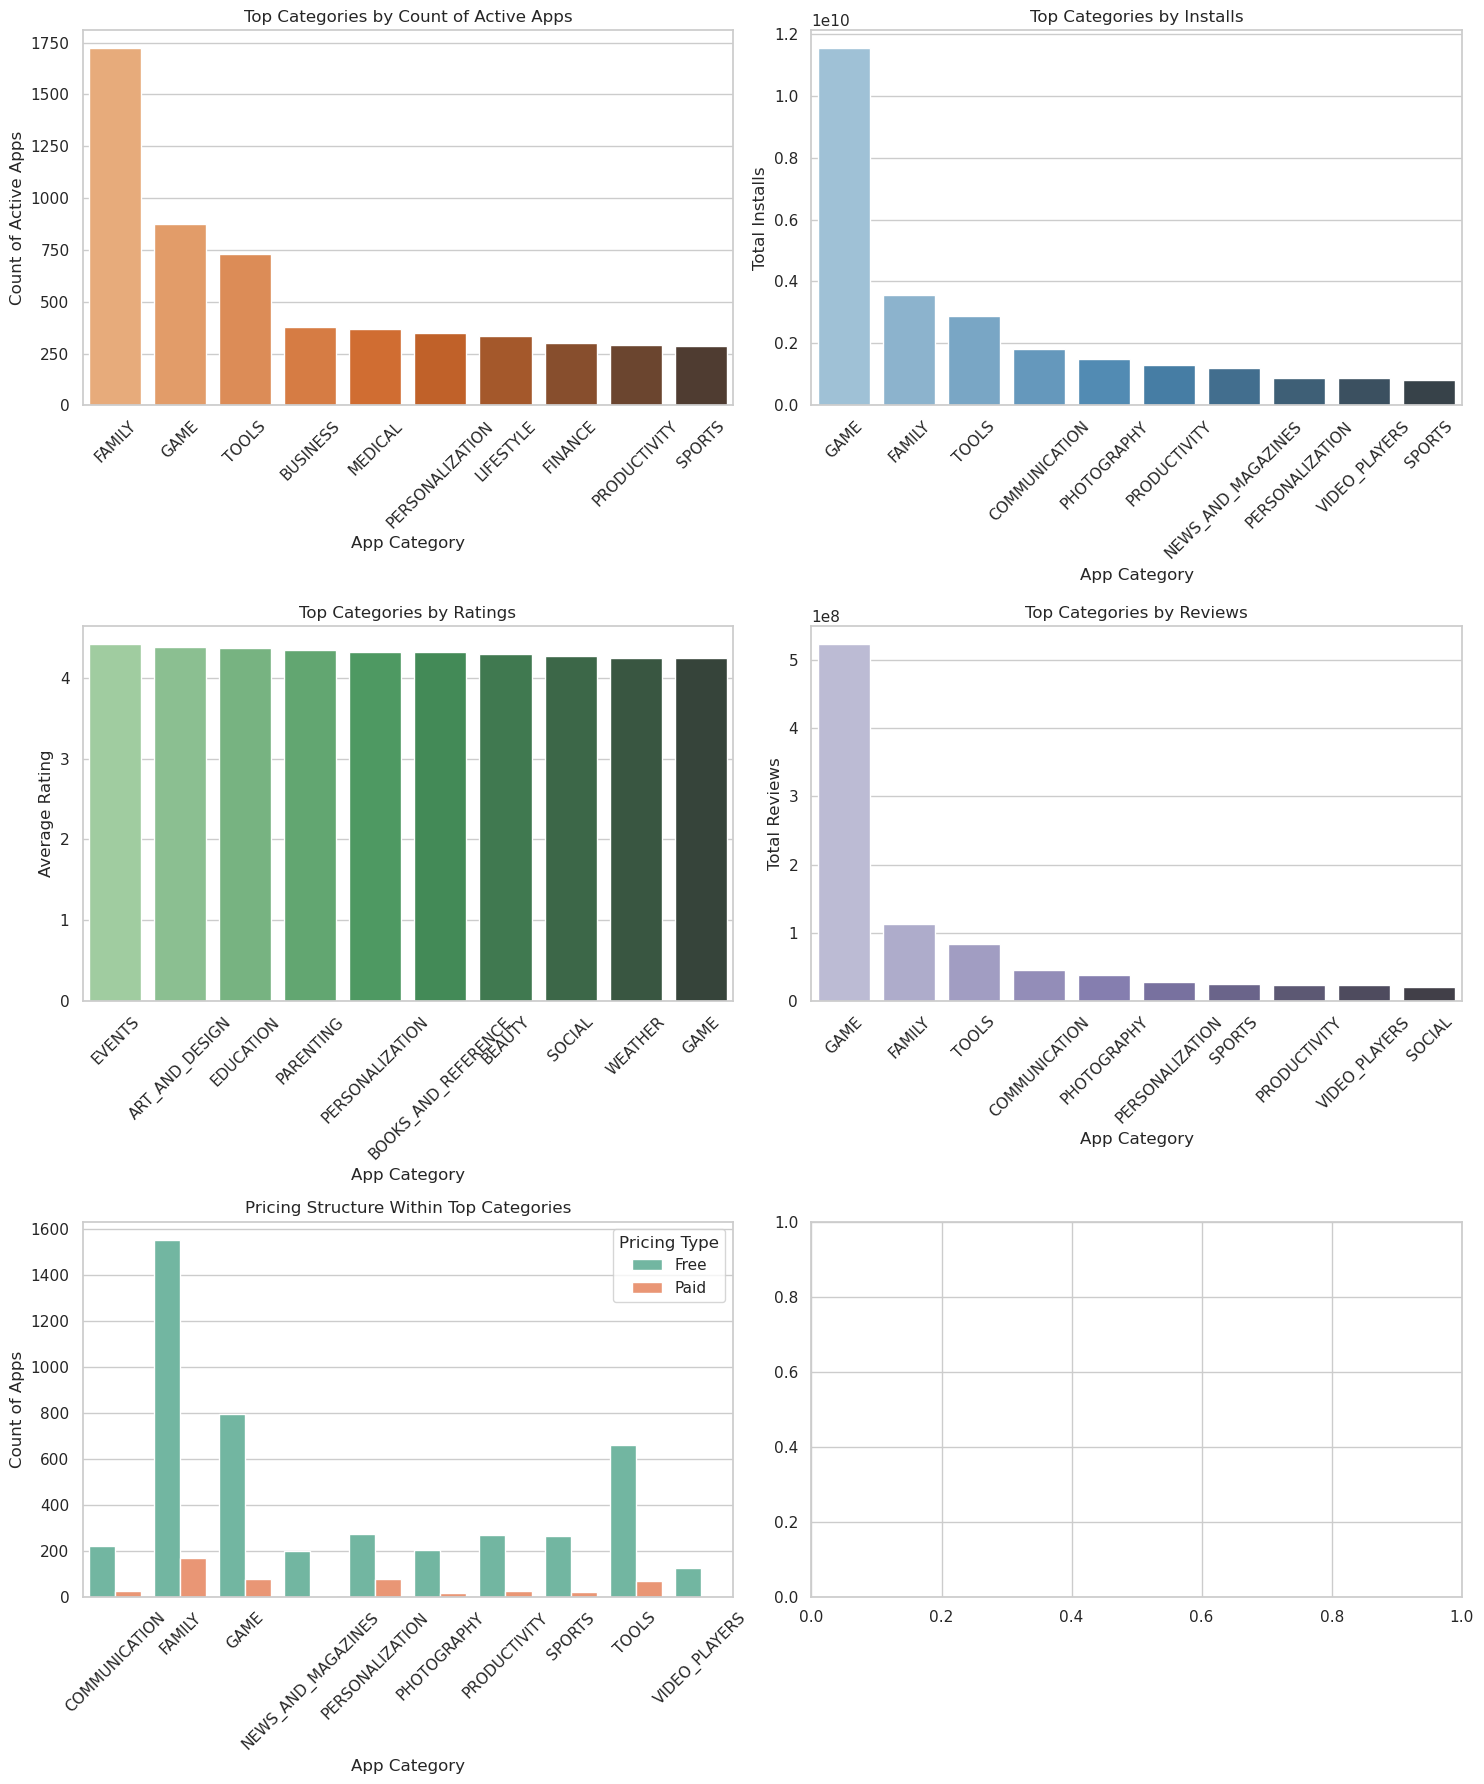

In [15]:
category_count = df_copy['Category'].value_counts().sort_values(ascending=False).head(10)
category_installs = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
category_ratings = df_copy.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
category_reviews = df_copy.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)
pricing_counts = df_copy[df_copy['Category'].isin(category_installs.index)].groupby(['Category', 'Type'])['App'].count().reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots using Seaborn
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))

# Plot for count of active categories using Seaborn
sns.barplot(x=category_count.index, y=category_count.values, ax=axes[0, 0], palette="Oranges_d")
axes[0, 0].set_title('Top Categories by Count of Active Apps')
axes[0, 0].set_xlabel('App Category')
axes[0, 0].set_ylabel('Count of Active Apps')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot for installs using Seaborn
sns.barplot(x=category_installs.index, y=category_installs.values, ax=axes[0, 1], palette="Blues_d")
axes[0, 1].set_title('Top Categories by Installs')
axes[0, 1].set_xlabel('App Category')
axes[0, 1].set_ylabel('Total Installs')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot for ratings using Seaborn
sns.barplot(x=category_ratings.index, y=category_ratings.values, ax=axes[1, 0], palette="Greens_d")
axes[1, 0].set_title('Top Categories by Ratings')
axes[1, 0].set_xlabel('App Category')
axes[1, 0].set_ylabel('Average Rating')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot for reviews using Seaborn
sns.barplot(x=category_reviews.index, y=category_reviews.values, ax=axes[1, 1], palette="Purples_d")
axes[1, 1].set_title('Top Categories by Reviews')
axes[1, 1].set_xlabel('App Category')
axes[1, 1].set_ylabel('Total Reviews')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot for pricing structure within top categories using Seaborn
sns.barplot(x='Category', y='App', hue='Type', data=pricing_counts, ax=axes[2, 0], palette="Set2")
axes[2, 0].set_title('Pricing Structure Within Top Categories')
axes[2, 0].set_xlabel('App Category')
axes[2, 0].set_ylabel('Count of Apps')
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].legend(title='Pricing Type')

plt.tight_layout()
plt.show()

Here's a concise summary along with recommendations based on the analysis:

- Active Apps Count: "Family, Games, and Tools are the most popular categories in terms of active app counts, suggesting strong user engagement and competition."

- Installs: "Games, Family, and Tools exhibit the highest number of installs, indicating their popularity among users."

- Ratings: "Events boasts the highest average ratings, while Games also stand out among highly rated categories."

- Reviews: "Games receive the most reviews, showcasing active user involvement, followed by Family and Tools."

- Pricing Structure: "People prefer free apps over paid ones, with Family leading the free category usage, followed by Games and Tools."

Considering the insights gained from the analysis, the company should strongly consider the Family and Games categories for the new app launch. Develop an app that provides an engaging experience, aligning with user preferences while being prepared to face competition. To monetize effectively, adopt a freemium model within the Family category to maximize user adoption and satisfaction.

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

To identify the most successful app developers in the Google Play Store dataset, we can analyze various features that provide insights into an app's success and the performance of its developer. \
Here's how we can approach this task and the features we might consider analyzing:

- Features to Analyze:
1. Number of Apps: Analyze the total number of apps each developer has published to understand their level of activity and contribution to the store.

2. Average Ratings: Evaluate the average ratings of apps from each developer to assess the quality of their offerings.

3. Total Installs: Consider the total number of installs across all apps by each developer to gauge their popularity and user reach.

4. Average Reviews: Calculate the average number of reviews per app to understand user engagement and feedback.

5. Content Categories: Analyze the distribution of content categories that the developer focuses on. Some categories may be more competitive or have higher user demand.

6. App Size and Updates: Look at the average app size and frequency of updates by the developer. Regular updates can signify active maintenance and improvements.

7. Monetization Strategies: Evaluate the mix of free and paid apps by the developer, as well as the pricing strategy they employ.

- Data Visualizations:
1. Bar Charts or Count Plots: Use bar charts or count plots to visualize the number of apps published by each developer. This can help identify prolific developers.

2. Bar Charts for Ratings and Installs: Create bar charts to show the average ratings and total installs for apps by each developer. This will reveal how well their apps are received and how widely they're adopted.

3. Scatter Plots: Employ scatter plots to display the relationship between the average ratings and total installs for each developer. This can help identify developers with high ratings and substantial installs.

4. Pie Charts for Content Categories: Use pie charts to display the distribution of app categories that each developer focuses on. This can highlight their areas of expertise.

5. Box Plots for App Size and Updates: Utilize box plots to show the distribution of app sizes and update frequencies for each developer. This can reveal their commitment to app quality and user experience.

6. Stacked Bar Charts for Monetization: Create stacked bar charts to visualize the proportion of free and paid apps by each developer. This can provide insights into their monetization strategy.

- Recommendations:
1. Identify developers with a consistent track record of high average ratings and substantial installs. These are likely to be successful and well-received by users.

2. Consider developers who focus on popular and high-demand app categories. This aligns with user preferences and market trends.

3. Developers who actively maintain their apps through frequent updates and engage with user feedback tend to have higher user satisfaction.

4. A mix of both free and paid apps can offer a balanced monetization approach. Analyze which developers have effectively monetized their apps without compromising user experience.

5. Collaborate with developers who not only create successful apps but also have a diverse portfolio across different categories. This indicates their adaptability and versatility.

6. By analyzing these features and presenting the findings through data visualizations, the mobile app development company can make informed decisions when selecting partners for potential collaborations or acquisitions.

Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

To identify the best time to launch a new app on the Google Play Store, we can analyze various features that could affect app performance and user engagement at different times. \
Here's how we can approach this task and the features we might consider analyzing:

- Features to Analyze:
1. Last Updated: Analyze the distribution of app updates over time to understand if there are certain periods when app updates are more frequent.

2. Category and Genre: Explore whether specific app categories or genres exhibit higher user engagement during certain times.

3. Installs: Analyze the number of app installs over time to identify trends in user adoption during different periods.

4. Ratings and Reviews: Examine how app ratings and reviews change over time, which can indicate user satisfaction and engagement.

5. Content Updates: Study how frequently app content (e.g., descriptions, images) is updated and whether this impacts user engagement.

6. Day of the Week: Analyze app performance on different days of the week to identify potential patterns of higher user engagement.

- Data Visualizations:
1. Time Series Plots: Use line plots or area plots to visualize trends in metrics like app installs, ratings, and reviews over time. This can help identify peak periods of user engagement.

2. Heatmaps: Create heatmaps to visualize the distribution of app updates, installs, or user engagement across different days of the week and months.

3. Bar Charts by Month/Day: Use bar charts to compare metrics like installs, ratings, and reviews on a monthly or daily basis to identify potential patterns.

4. Box Plots by Category/Genre: Employ box plots to compare user engagement metrics across different app categories or genres to identify trends specific to each.

5. Histograms: Use histograms to analyze the distribution of app updates or user engagement metrics to find patterns or outliers.

6. Correlation Matrix: Create a correlation matrix to understand the relationships between app performance metrics and time-related factors.

- Recommendations:
1. Analyze app performance trends over time to identify the most favorable periods for launching or updating the app.

2. Consider launching the app during periods of higher user engagement, such as days of the week or months when installs, ratings, and reviews are higher.

3. Monitor app categories or genres that exhibit increased user engagement during specific times and align your launch with those periods.

4. Regularly update app content and features to maintain user interest and engagement, potentially leading to more successful launches.

5. Take into account trends in user behavior and preferences when planning the launch timeline, keeping in mind the cyclical nature of app engagement.

6. By analyzing these features and presenting the findings through data visualizations, the marketing research firm can make informed recommendations on the optimal timing for launching a new app on the Google Play Store.

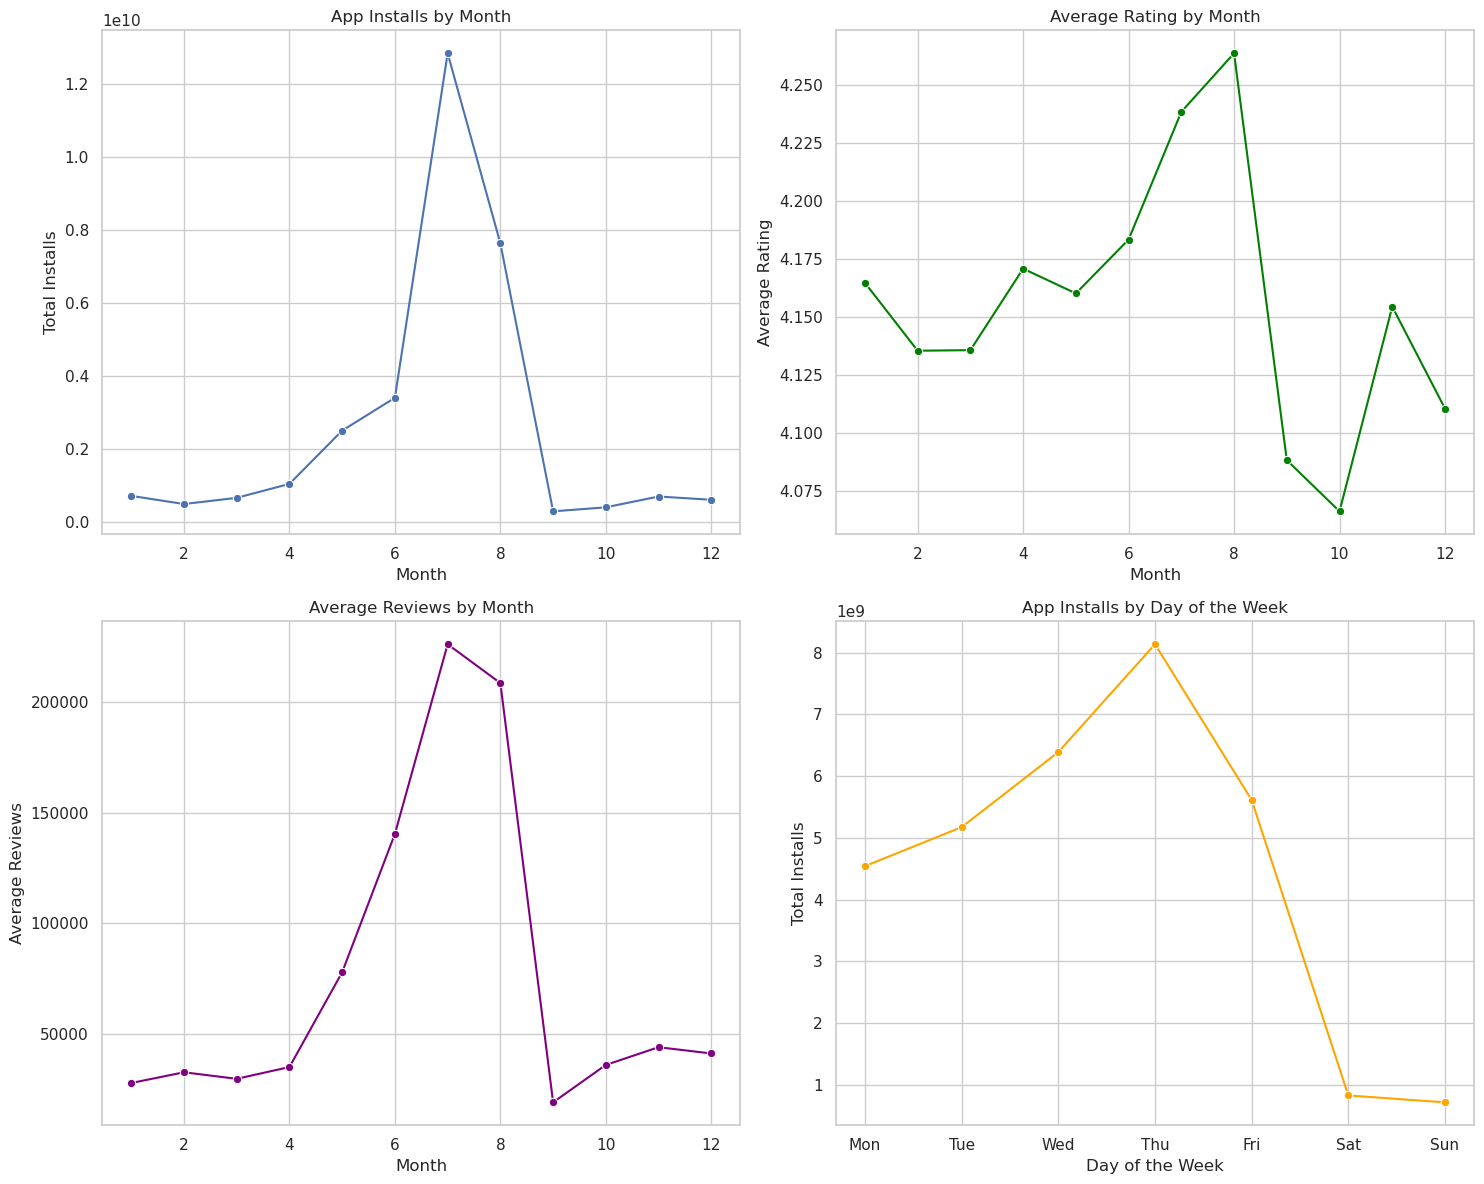

In [21]:
# Extract day of the week from 'Last Updated'
df_copy['DayOfWeek'] = df_copy['Last Updated'].dt.dayofweek

# Calculate metrics for each month and day of the week
month_metrics = df_copy.groupby('Month').agg({
    'Installs': 'sum',
    'Rating': 'mean',
    'Reviews': 'mean'
}).reset_index()

day_metrics = df_copy.groupby('DayOfWeek').agg({
    'Installs': 'sum',
    'Rating': 'mean',
    'Reviews': 'mean'
}).reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Plot for Installs by Month using Seaborn
sns.lineplot(data=month_metrics, x='Month', y='Installs', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('App Installs by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Installs')

# Plot for Average Rating by Month using Seaborn
sns.lineplot(data=month_metrics, x='Month', y='Rating', marker='o', color='green', ax=axes[0, 1])
axes[0, 1].set_title('Average Rating by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Rating')

# Plot for Average Reviews by Month using Seaborn
sns.lineplot(data=month_metrics, x='Month', y='Reviews', marker='o', color='purple', ax=axes[1, 0])
axes[1, 0].set_title('Average Reviews by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average Reviews')

# Plot for Installs by Day of the Week using Seaborn
sns.lineplot(data=day_metrics, x='DayOfWeek', y='Installs', marker='o', color='orange', ax=axes[1, 1])
axes[1, 1].set_title('App Installs by Day of the Week')
axes[1, 1].set_xlabel('Day of the Week')
axes[1, 1].set_ylabel('Total Installs')
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

Insights and Conclusions:

- App Installs Trend: The highest app installs occur between months 6 (June) and 7 (July), with a peak in the 7th month. This period might indicate increased user engagement and adoption.

- Average Rating Peak: The average rating reaches its highest point between months 6 (June) and 8 (August), peaking in the 8th month. This suggests that users might be more satisfied during these months.

- Average Reviews Surge: Highest average reviews are observed between months 6 (June) and 8 (August), with the peak in the 8th month. This indicates a higher level of user engagement and interaction.

- Day of the Week: App installs are notably higher on Thursdays, indicating a potential preference for downloading and installing apps toward the end of the week.

Recommendation to the Company:

- Based on the analysis, the company should consider launching the new app between the months of June and August to align with peak periods of user engagement, high ratings, and active user reviews. Furthermore, launching the app on a Thursday could potentially maximize initial installs and user interest.